# Preparing objects to share with paper

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
# read in data
data_atlas = sc.read_h5ad('NRclean_clustered2.h5ad')
data_AllDC = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')
data_DC2 = sc.read_h5ad('20250629_DC2_bbknn_clustered2.h5ad')
data_scvi = sc.read_h5ad('NRclean_scVI_Data.h5ad')

# Make consistent metadata columns

### Check everything has all the columns I need

In [4]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions'

In [5]:
# For data_AllDC copy NR_annotations_simple to new column called MyeloidAPC_Subsets
data_AllDC.obs['MyeloidAPC_Subsets'] = data_AllDC.obs['NR_annotations_simple']

In [6]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

In [7]:
# For data_DC2 copy NR_annotations_simple to new column called MyeloidAPC_Subsets
data_DC2.obs['MyeloidAPC_Subsets'] = data_DC2.obs['NR_annotations_simple']

In [8]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
# For data_scvi make MyeloidAPC_Subsets
data_scvi.obs["MyeloidAPC_Subsets"] = data_scvi.obs["NR_annotations_simple"].map(
    {
        "Tissue resident macrophage": "Tissue resident macrophage",
        "Classical monocytes": "Classical monocytes",
        "non-classical monocytes": "non-classical monocytes",
        "cDC2": "cDC2",
        "cDC1": "cDC1",
        "KI-67+ Tissue resident macrophage": "Tissue resident macrophage",
        "mregDC": "mregDC",
    }
)

In [10]:
data_scvi.obs["MyeloidAPC_Subsets"].value_counts()

MyeloidAPC_Subsets
Tissue resident macrophage    381441
Classical monocytes            57086
non-classical monocytes        29255
cDC2                           17391
cDC1                            6730
mregDC                          6120
Name: count, dtype: int64

# Remove unnecessary metadata columns from each object

## data_atlas

In [11]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

### Remove the following columns from data_atlas
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotations', 'NR_annotations_simple', 'cancer_with_H', 'CytoTRACE_DC_Predicted_order', 'AHR(+)', 'ATF3(+)', 'BACH2(+)', 'BATF(+)', 'BHLHE40(+)', 'BHLHE41(+)', 'CREM(+)', 'DDIT3(+)', 'ELF3(+)', 'ETS1(+)', 'FOSL2(+)', 'GATA3(+)', 'HIF1A(+)', 'IKZF2(+)', 'IRF1(+)', 'IRF4(+)', 'IRF8(+)', 'JUN(+)', 'KLF12(+)', 'KLF4(+)', 'MAF(+)', 'MAFF(+)', 'NFE2(+)', 'NFKB1(+)', 'NFKB2(+)', 'NR1H3(+)', 'PRDM1(+)', 'REL(+)', 'SOX4(+)', 'TCF7L2(+)', 'keep_or_remove'

### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets'


In [12]:
data_atlas.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 
                             'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 
                             'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 
                             'cDC2_mregDC', 'NR_annotations', 'NR_annotations_simple', 'cancer_with_H', 'CytoTRACE_DC_Predicted_order', 'AHR(+)', 'ATF3(+)', 'BACH2(+)', 'BATF(+)', 'BHLHE40(+)', 
                             'BHLHE41(+)', 'CREM(+)', 'DDIT3(+)', 'ELF3(+)', 'ETS1(+)', 'FOSL2(+)', 'GATA3(+)', 'HIF1A(+)', 'IKZF2(+)', 'IRF1(+)', 'IRF4(+)', 'IRF8(+)', 'JUN(+)', 'KLF12(+)', 
                             'KLF4(+)', 'MAF(+)', 'MAFF(+)', 'NFE2(+)', 'NFKB1(+)', 'NFKB2(+)', 'NR1H3(+)', 'PRDM1(+)', 'REL(+)', 'SOX4(+)', 'TCF7L2(+)', 'keep_or_remove'], inplace=True)

In [13]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'MyeloidAPC_Subsets_colors', 'NR_annotations_colors', 'NR_annotations_simple_colors', 'cancer_type_broad_colors', 'clean-leiden_0.8', 'clean-leiden_0.8_colors', 'clean-subcluster', 'clean-subcluster-v2', 'clea

## data_AllDC

In [14]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 

### Remove the following columns from data_AllDC
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'NR_annotations_simple', 'cancer_with_H', 'keep_or_remove', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'

### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets'


In [15]:
data_AllDC.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 
                             'NR_annotations_simple', 'cancer_with_H', 'keep_or_remove', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'], inplace=True)

In [16]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'NR_annotations_simple_colors', 'dendrogram_NR_annotations_simple', 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectiviti

## data_DC2

In [17]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

### Remove the following columns from data_DC2
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M','NR_annotations_simple', 'cancer_with_H', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 'DC3_sig', '2025-DC2-true_02', '2025-DC2-true_05', '2025-DC2-true_08', '2025-DC2-true_08_sub5', '2025-DC2-true_08_sub5-1', 'cDC2A_sig', 'cDC2B_sig', 'DC_CD207_Moon_sig', 'cDC2A_Minutti_sig', 'DC2_CD207_Gui_sig', 'DC2_CD1A_Cheng_sig'


### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets', 'cDC2_A-B', 'cDC2_Atlas_Subclusters',


In [18]:
data_DC2.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 
                           'leiden_M','NR_annotations_simple', 'cancer_with_H', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 
                           'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 'DC3_sig', 
                           '2025-DC2-true_02', '2025-DC2-true_05', '2025-DC2-true_08', '2025-DC2-true_08_sub5', '2025-DC2-true_08_sub5-1', 'cDC2A_sig', 'cDC2B_sig', 'DC_CD207_Moon_sig', 
                           'cDC2A_Minutti_sig', 'DC2_CD207_Gui_sig', 'DC2_CD1A_Cheng_sig'], inplace=True)

In [19]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

## data_scvi

In [20]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

### Remove the following columns from data_scvi
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'NR_annotations_simple', 'cancer_with_H' 


### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','Technology','sample_type_major2', 'cancer_broadest','patient_treatment', , '_scvi_batch', '_scvi_labels', 'MyeloidAPC_Subsets'


In [21]:
data_scvi.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'NR_annotations_simple', 'cancer_with_H','_scvi_batch','_scvi_labels'], inplace=True)

In [22]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# Visualise each object and check it appears as in manuscript - set colours

In [23]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'MyeloidAPC_Subsets_colors', 'NR_annotations_colors', 'NR_annotations_simple_colors', 'cancer_type_broad_colors', 'clean-leiden_0.8', 'clean-leiden_0.8_colors', 'clean-subcluster', 'clean-subcluster-v2', 'clea

In [24]:
# Set colours for MyeloidAPC_Subsets plot:
data_atlas.uns["MyeloidAPC_Subsets_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

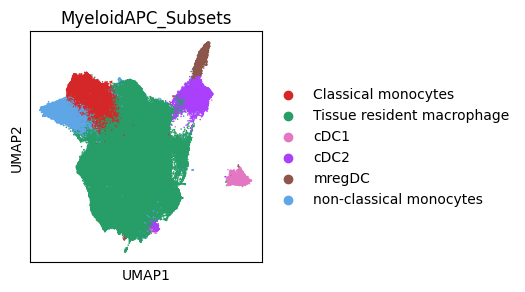

In [25]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_atlas, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

In [26]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'NR_annotations_simple_colors', 'dendrogram_NR_annotations_simple', 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectiviti

In [27]:
# Set colours for MyeloidAPC_Subsets plot:
data_AllDC.uns["MyeloidAPC_Subsets_colors"] = ['#e377c2', '#aa40fc', '#8c564b']  

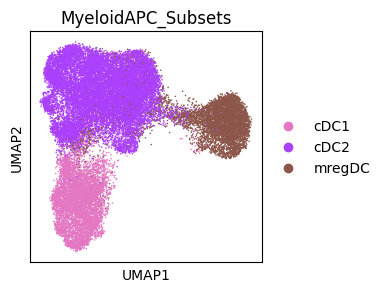

In [28]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_AllDC, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

In [29]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [43]:
# Set colours for MyeloidAPC_Subsets plot:
data_scvi.uns["MyeloidAPC_Subsets_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

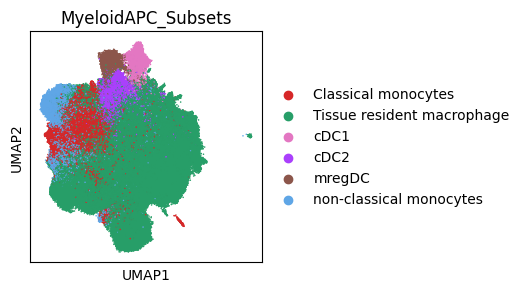

In [44]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_scvi, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

In [35]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

In [45]:
# Set colours for MyeloidAPC_Subsets plot:
data_DC2.uns["MyeloidAPC_Subsets_colors"] = ['#aa40fc']  

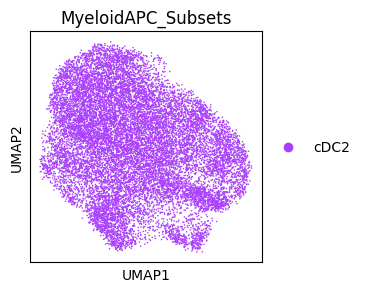

In [46]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

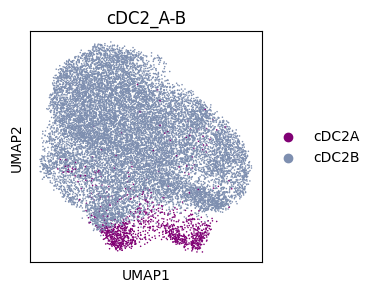

In [47]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["cDC2_A-B"], ncols=1, size=5)

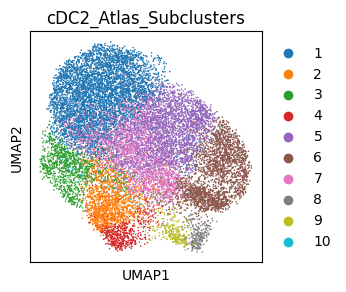

In [48]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["cDC2_Atlas_Subclusters"], ncols=1, size=5)

# Export plots for viewer

In [65]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='pdf')

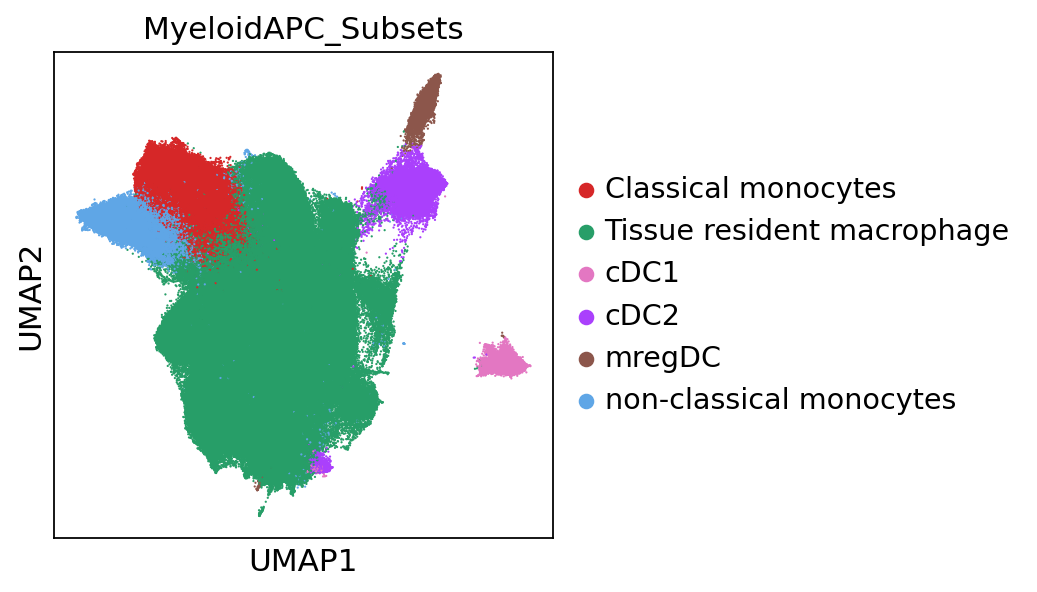

In [66]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_atlas, color=["MyeloidAPC_Subsets"], ncols=1, size=4, save='Atlas_Share.pdf')

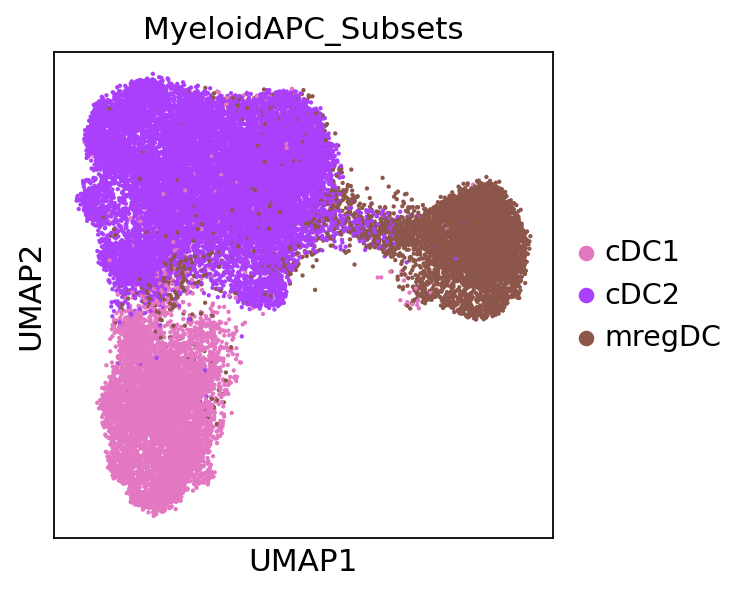

In [67]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_AllDC, color=["MyeloidAPC_Subsets"], ncols=1, size=15, save='AllDC_Share.pdf')

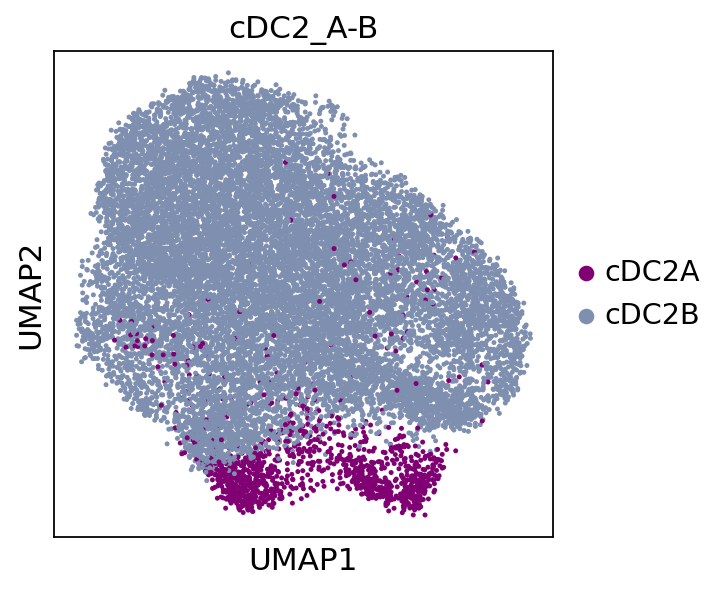

In [68]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=["cDC2_A-B"], ncols=1, size=20, save='DC2_Share.pdf')

# Export objects for sharing

In [52]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap', 'MyeloidAPC_Subsets_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [69]:
# export object: 
data_atlas.write_h5ad("MyeloidAPC_Atlas_Share.h5ad", compression="gzip")
data_AllDC.write_h5ad("MyeloidAPC_DC_Share.h5ad", compression="gzip")
data_scvi.write_h5ad("MyeloidAPC_SCVI_Share.h5ad", compression="gzip")
data_DC2.write_h5ad("MyeloidAPC_DC2_Share.h5ad", compression="gzip")

## Add cDC2A/cDC2B annotations to data_AllDC - not using

In [29]:
#copy metadata column
data_AllDC.obs['MyeloidAPC_Subsets_with_cDC2AB'] = data_AllDC.obs['MyeloidAPC_Subsets']

In [30]:
data_AllDC.obs["MyeloidAPC_Subsets"].value_counts()

MyeloidAPC_Subsets
cDC2      17166
cDC1       6670
mregDC     6051
Name: count, dtype: int64

In [31]:
data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"].value_counts()

MyeloidAPC_Subsets_with_cDC2AB
cDC2      17166
cDC1       6670
mregDC     6051
Name: count, dtype: int64

In [32]:
data_DC2.obs["cDC2_A-B"].value_counts()

cDC2_A-B
cDC2B    15398
cDC2A     1245
Name: count, dtype: int64

In [35]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

In [33]:
#update 
data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"] = data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"].astype(str)
data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"].update(data_DC2.obs["cDC2_A-B"]) 

/scratch/temp/15050596/ipykernel_4099673/3814169603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"].update(data_DC2.obs["cDC2_A-B"])


In [34]:
data_AllDC.obs["MyeloidAPC_Subsets_with_cDC2AB"].value_counts()

MyeloidAPC_Subsets_with_cDC2AB
cDC2B     15398
cDC1       6670
mregDC     6051
cDC2A      1245
cDC2        523
Name: count, dtype: int64

In [ ]:
#define cells in data_DC2
common_cells = data_DC2.obs_names.intersection(data_AllDC.obs_names)

In [39]:
# Now update label for only those cells
data_AllDC.obs.loc[common_cells, 'MyeloidAPC_Subsets_cDC2AB'] = data_DC2.obs.loc[common_cells, 'cDC2_A-B']

In [40]:
# Preview result
data_AllDC.obs[['MyeloidAPC_Subsets', 'MyeloidAPC_Subsets_cDC2AB']].head()

,MyeloidAPC_Subsets,MyeloidAPC_Subsets_cDC2AB
GSE215120_AM1_AAATGCCCAGAGCCAA-1,cDC2,cDC2B
GSE215120_AM1_ACACTGATCCACTGGG-1,cDC2,cDC2B
GSE215120_AM1_ACAGCCGCAAACCTAC-1,cDC2,cDC2B
GSE215120_AM1_ACCAGTAAGACTGGGT-1,cDC1,NaN
GSE215120_AM1_ACGTCAACAAGGACTG-1,cDC1,NaN


In [34]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

# Prepare objects for viewer: 
* make sure all genes in .var_names as this is what cellxgene reads from
* check order of metadata

In [3]:
# read in data
data_atlas = sc.read_h5ad('MyeloidAPC_Atlas_Share.h5ad')
data_AllDC = sc.read_h5ad('MyeloidAPC_DC_Share.h5ad')
data_DC2 = sc.read_h5ad('MyeloidAPC_DC2_Share.h5ad')

In [6]:
#overwrite main matrix with raw
data_atlas_full = data_atlas.raw.to_adata()
data_AllDC_full = data_AllDC.raw.to_adata()
data_DC2_full = data_DC2.raw.to_adata()

In [11]:
# Check if gene is in raw
"CSF1R" in data_atlas.raw.var_names


True

In [5]:
# Compare with main object
"CSF1R" in data_atlas.var_names

False

In [9]:
# Compare with main object
"CSF1R" in data_atlas_full.var_names

True

In [18]:
# export object: 
data_atlas_full.write_h5ad("MyeloidAPC_Atlas_Viewer.h5ad", compression="gzip")
data_AllDC_full.write_h5ad("MyeloidAPC_AllDC_Viewer.h5ad", compression="gzip")
data_DC2_full.write_h5ad("MyeloidAPC_DC2_Viewer.h5ad", compression="gzip")

# Copy to RDM
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/Myeloid_Objects/MyeloidAPC_Atlas_Viewer.h5ad /QRISdata/Q5935/nikita/scdata/20250906_Myeloid_Objects_Manuscript_Viewer/
rsync -azvhp /scratch/user/s4436039/scdata/Myeloid_Objects/MyeloidAPC_AllDC_Viewer.h5ad /QRISdata/Q5935/nikita/scdata/20250906_Myeloid_Objects_Manuscript_Viewer/
rsync -azvhp /scratch/user/s4436039/scdata/Myeloid_Objects/MyeloidAPC_DC2_Viewer.h5ad /QRISdata/Q5935/nikita/scdata/20250906_Myeloid_Objects_Manuscript_Viewer/

rsync -azvhp /scratch/user/s4436039/scdata/Myeloid_Objects/MyeloidAPC_Atlas_Viewer.h5ad /QRISdata/Q5935/nikita/scdata/20250906_Myeloid_Objects_Manuscript_Viewer/

rsync -azvhp /scratch/user/s4436039/scdata/Myeloid_Objects/MyeloidAPC_Atlas_Viewer.h5ad /QRISdata/Q5935/nikita/scdata/20250906_Myeloid_Objects_Manuscript_Viewer2/

```